## Informações dos vereadores de Jacareí

Análise dos dados das ações dos vereadores disponibilizados no site da Câmara municipal de Jacareí. Neste documento, vamos fazer uma análise de serie temporal, entre os meses de Junho e Agosto.

Neste caso os dados foram baixados e serão carregados de arquivos `CSV`.

`OBS`: Esta análise é feitas apenas para demonstrar funcionalidades do Python e suas bibliotecas, e de como elas ajudam na análise de dados, sendo assim, o que é exposto, é apenas resultado do que está registrado nos dados, sem nenhuma tendência política.

In [74]:
import pandas as pd

In [113]:
junho = pd.read_csv('../../../dados/dados_remuneracao_vereadores/jac_junho_2018.csv')
julho = pd.read_csv('../../../dados/dados_remuneracao_vereadores/jac_julho_2018.csv')
agosto = pd.read_csv('../../../dados/dados_remuneracao_vereadores/jac_agosto_2018.csv')

## Conhecendo os dados

Para começar vamos verificar uma descrição simples dos dados, para ter uma ideia de onde começar a fazer a análise.

In [6]:
junho.describe()

,Ano,Atendimento aos munícipes,Diárias de Viagens,Gasolina/Álcool (Litros),Gasolina/Álcool (R$),Impressão Colorida,Manutenção de Veículos,Material de Escritório,Telefonia Fixa,Telefonia Móvel,Xerox (Central),Xerox (Duplicadora),Xerox (Gabinete)
count,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000
mean,2018.0,124.769231,25.384615,77.701692,333.340260,230.615385,239.846154,364.591538,128.261538,20.618462,285.923077,0.0,1505.923077
std,0.0,88.598489,63.410749,50.213956,215.417871,91.709267,542.320607,189.534504,70.396434,17.439668,341.299590,0.0,758.726286
min,2018.0,41.000000,0.000000,0.000000,0.000000,114.000000,0.000000,1.690000,67.480000,0.780000,0.000000,0.0,539.000000
25%,2018.0,66.000000,0.000000,44.311000,190.094190,173.000000,0.000000,390.020000,84.860000,11.170000,12.000000,0.0,1082.000000
50%,2018.0,115.000000,0.000000,70.030000,300.428700,204.000000,40.000000,435.360000,91.430000,18.080000,223.000000,0.0,1197.000000
75%,2018.0,146.000000,0.000000,119.930000,514.499700,265.000000,50.000000,455.070000,156.710000,33.370000,269.000000,0.0,1842.000000
max,2018.0,336.000000,198.000000,157.079000,673.868910,421.000000,1816.000000,540.640000,300.850000,63.100000,1000.000000,0.0,3139.000000


Veja que, conseguimos perceber vários pontos interessantes, veja a quantidade de atendimentos, os gastos com escritórios, e muito mais, e isto tudo, apenas no mês de junho.

Vamos começar analisando os vereadores que mais atendem os munícipes, inicialmente no mês de junho, depois faremos uma análise temporal, dentre os meses analisados.

In [31]:
atendimentos_junho = junho[['Atendimento aos munícipes', 'Vereador']]

In [37]:
atendimentos_junho.sort_values('Atendimento aos munícipes', ascending = False)

,Atendimento aos munícipes,Vereador
12,336,Valmir do Pq. Meia Lua
10,262,Paulinho dos Condutores
1,162,Aderbal Sodré
11,146,Sônia Patas da Amizade
7,132,Lucimar Ponciano
5,126,Fernando da Ótica Original
9,115,Paulinho do Esporte
8,77,Luís Flávio
3,72,Dra. Márcia Santos
2,66,Arildo Batista


Para transformar a visualização em algo legal, vamos fazer um plot de barras, com cada vereador e sua quantidade de antendimento.

Text(0.5,0,'Quantidade de atendimentos')

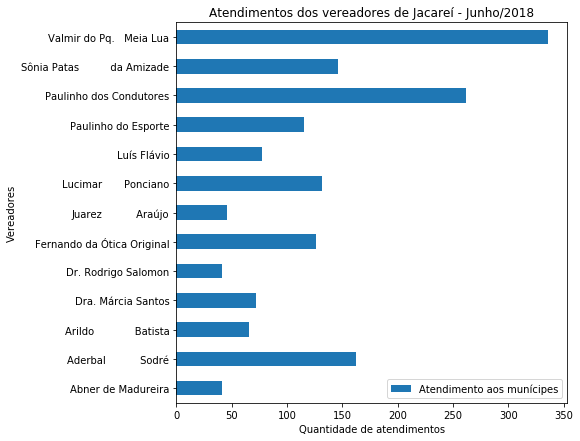

In [98]:
ax = atendimentos_junho.plot(kind = 'barh', figsize=(7, 7), title='Atendimentos dos vereadores de Jacareí - Junho/2018')


ax.set_yticklabels(atendimentos_junho['Vereador'])

# Alterando os valores dos labels X e Y
ax.set_ylabel('Vereadores')
ax.set_xlabel('Quantidade de atendimentos')

Olha que bacana, assim é mais bacana de realizar a visualização. Pois é, então agora já sabemos qual é a quantidade de atendimento que cada vereador vez no mês de junho de 2018, mas será que este número é parecido nos outros meses ?

Vamos agora começar a trabalhar com uma pequena serie temporal utilizando o Pandas. Para isto vamos juntar os dados, todos em um único DataFrame.

`OBS`: Apenas uma dica, aqui vamos simplesmente fazer esta junção, pois verificamos que, os dados dos vereadores estão separados em ordem alfabética :D

In [84]:
atendimentos_series = pd.concat([
                                    junho['Atendimento aos munícipes'], 
                                    julho['Atendimento aos munícipes'],
                                    agosto['Atendimento aos munícipes'],
                                    junho['Vereador']], axis = 1)

Após a junção dos DataFrames, jamos agrupa-los, utilizando como referência a coluna `Vereador`, assim teremos o quanto cada um deles atendeu, em todos os três meses que estamos analisando.

In [95]:
atendimentos_series.groupby('Vereador')

Com o agrupamento feito, vamos direto para o plot, para verificar se há muita diferença.

[Text(0,0,'Abner de Madureira'),
 Text(0,0,'Aderbal           Sodré'),
 Text(0,0,'Arildo             Batista'),
 Text(0,0,'Dra. Márcia Santos'),
 Text(0,0,'Dr. Rodrigo Salomon'),
 Text(0,0,'Fernando da Ótica Original'),
 Text(0,0,'Juarez           Araújo'),
 Text(0,0,'Lucimar       Ponciano'),
 Text(0,0,'Luís Flávio'),
 Text(0,0,'Paulinho do Esporte'),
 Text(0,0,'Paulinho dos Condutores'),
 Text(0,0,'Sônia Patas          da Amizade'),
 Text(0,0,'Valmir do Pq.   Meia Lua')]

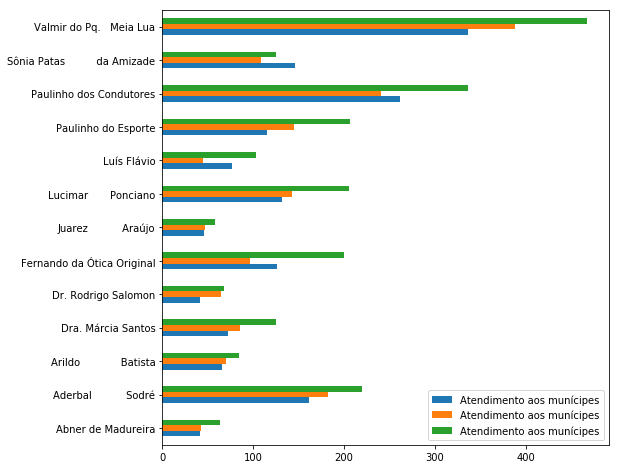

In [97]:
ax = atendimentos_series.plot(kind = 'barh', figsize=(8, 8))

ax.set_yticklabels(atendimentos_junho['Vereador'])

Com poucos comandos já fizemos uma análise de serie temporal deste conjunto de dados =D, além dos atendimentos é interessante saber também, o gasto com telefonia de cada vereador, dentre os meses analisados. Vamos lá !

Porém desta vez, para facilitar, vamos juntar de uma vez, todos os conjuntos de dados, e deste, vamos retirar as informações que queremos, faremos isto para evitar ter que realizar junções futuras.

Antes da junção, fazemos ainda uma pequena alteração no nome das colunas, utilizando a função `map`, alteramos o nome de todos os elementos da coluna, trocando os espaços por `_` e colocando o prefixo do mês do final do nome de cada coluna.

In [ ]:
# Alterando os nomes de cada coluna, adicionando o prefixo de seu mês (_jun, _jul, _ago)
junho.columns = map(lambda x: x.replace(' ', '_') + '_jun', junho.columns)
julho.columns = map(lambda x: x.replace(' ', '_') + '_jul', julho.columns)
agosto.columns = map(lambda x: x.replace(' ', '_') + '_ago', agosto.columns)

series = pd.concat([
    junho, julho, agosto
], axis = 1)

In [124]:
# Recuperando somente as colunas que nos interessa
telefonia_series = series[[
    'Vereador_jun',
    'Telefonia_Fixa_jun', 'Telefonia_Fixa_jul', 'Telefonia_Fixa_ago',
    'Telefonia_Móvel_jun', 'Telefonia_Móvel_jun', 'Telefonia_Móvel_ago'
]]

Com todo este pequeno tratamento, agora temos todos os gastos relacionados a telefonia (Móvel e fixa) de todos os vereadores, vamos verificar agora, quem tem os maiores gastos. 

In [127]:
groupo_telefonia = telefonia_series.groupby('Vereador_jun')

In [ ]:
ax = groupo_telefonia.plot(kind = 'barh', figsize = (8, 8))

Abner de Madureira                      AxesSubplot(0.1,0.736957;0.173913x0.163043)
Aderbal           Sodré            AxesSubplot(0.308696,0.736957;0.173913x0.163043)
Arildo             Batista         AxesSubplot(0.517391,0.736957;0.173913x0.163043)
Dr. Rodrigo Salomon                AxesSubplot(0.726087,0.736957;0.173913x0.163043)
Dra. Márcia Santos                      AxesSubplot(0.1,0.541304;0.173913x0.163043)
Fernando da Ótica Original         AxesSubplot(0.308696,0.541304;0.173913x0.163043)
Juarez           Araújo            AxesSubplot(0.517391,0.541304;0.173913x0.163043)
Lucimar       Ponciano             AxesSubplot(0.726087,0.541304;0.173913x0.163043)
Luís Flávio                             AxesSubplot(0.1,0.345652;0.173913x0.163043)
Paulinho do Esporte                AxesSubplot(0.308696,0.345652;0.173913x0.163043)
Paulinho dos Condutores            AxesSubplot(0.517391,0.345652;0.173913x0.163043)
Sônia Patas          da Amizade    AxesSubplot(0.726087,0.345652;0.173913x0.

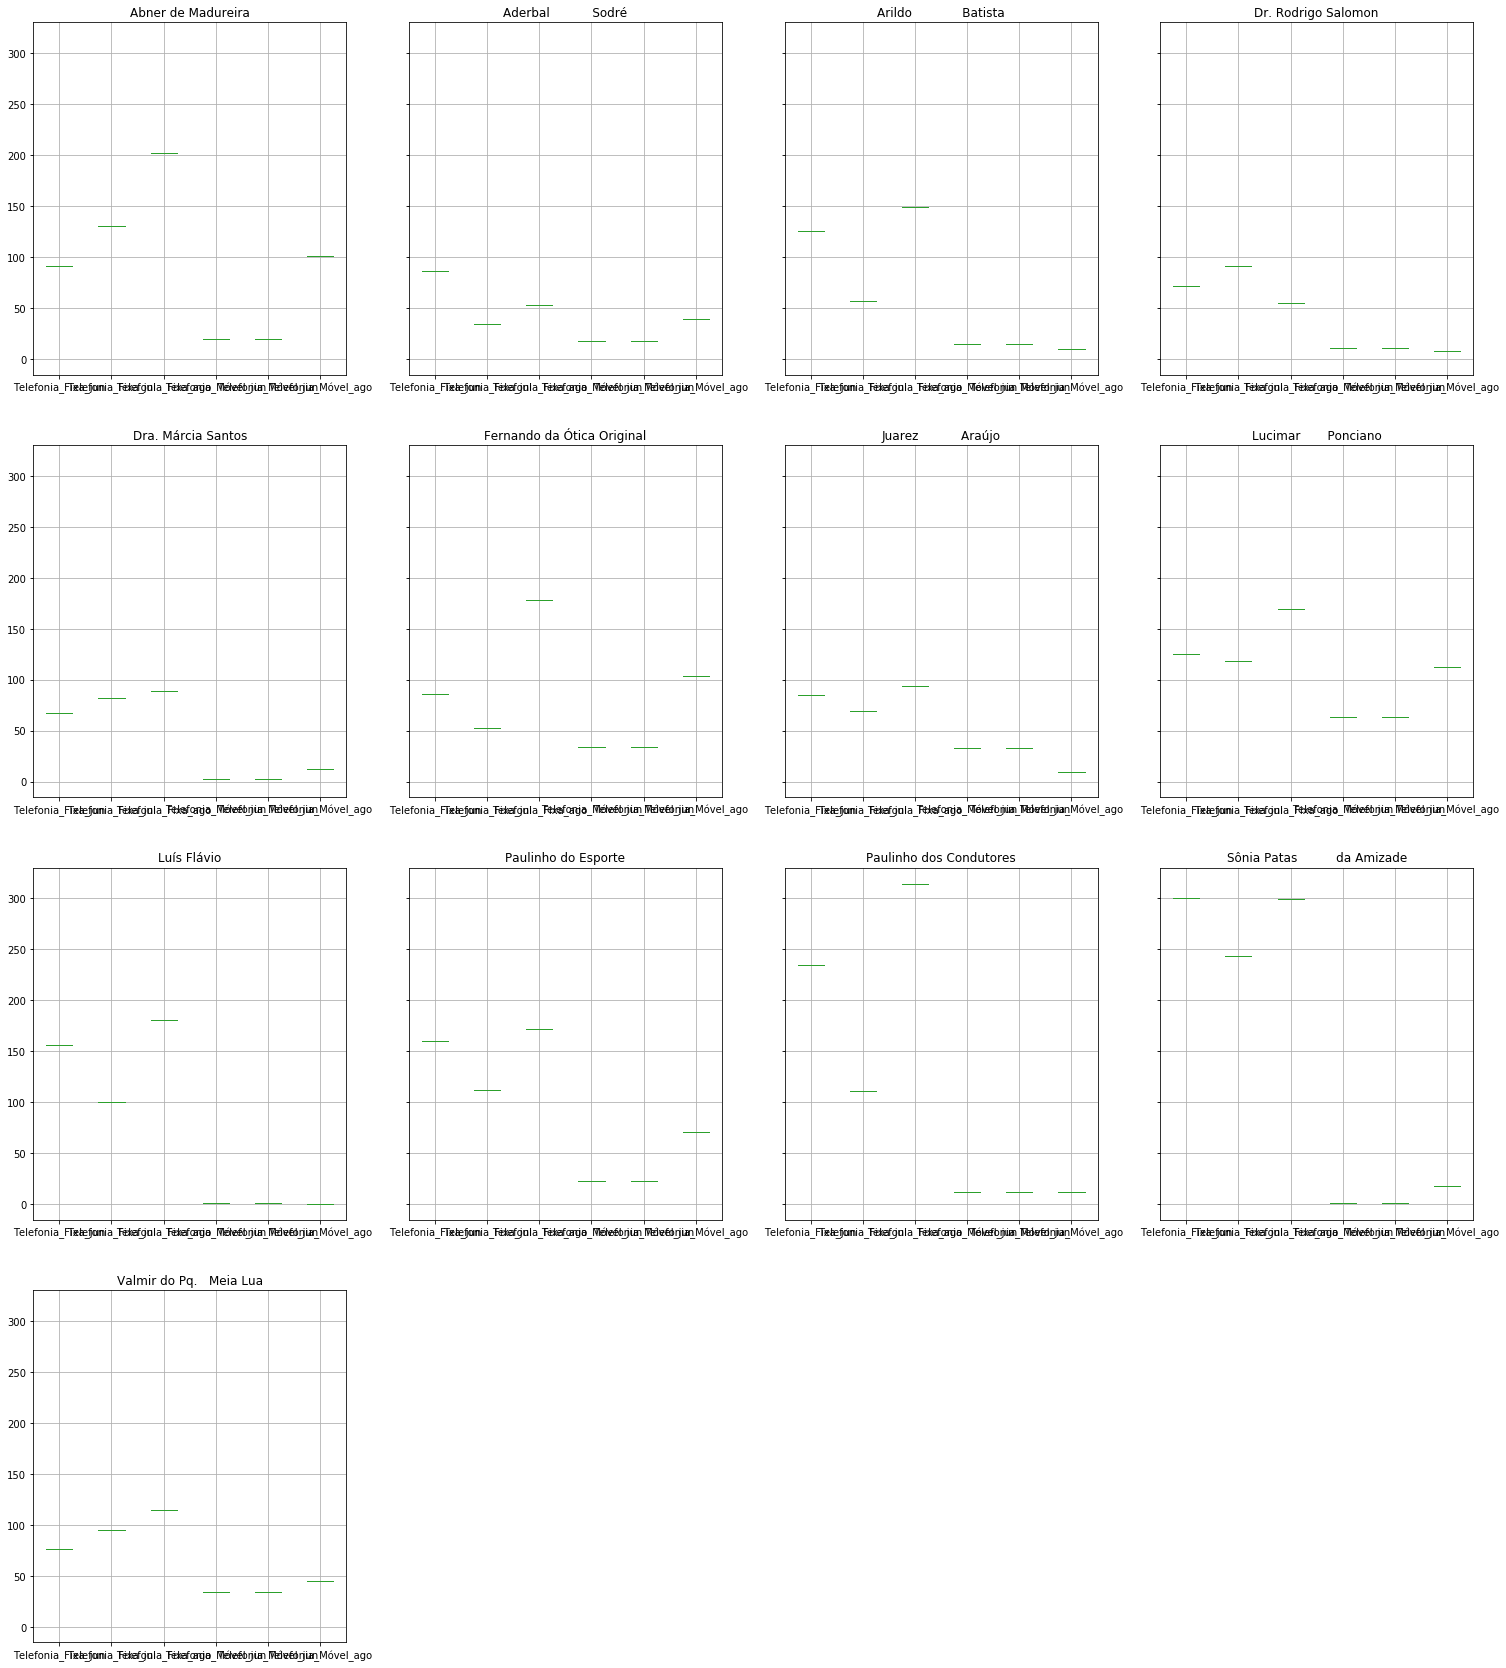

In [155]:
groupo_telefonia.boxplot(figsize=(25, 30))

Pronto agora sabemos também o quanto é gasto com a telefonia por cada vereador, nos meses em que fizemos a análise. Isto tudo é bacaba, e aqui conseguimos perceber o quão poderosas e simples as ferramentas de Python podem ser.

Além das análises que fizemos, existem outras infinitas que podemos fazer, vincular por exemplo, a quantidade de atendimentos com o gasto do telefone, seria também uma coisa bacana. Além de várias outras, como por exemplo, o uso da impressora por cada vereador, e por ai vai.